<a href="https://colab.research.google.com/github/hyeryn/Natural-Language/blob/master/news_posneg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

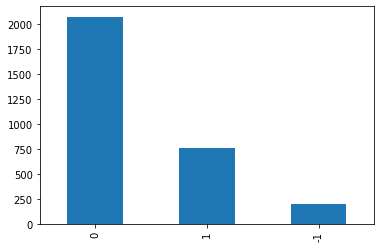

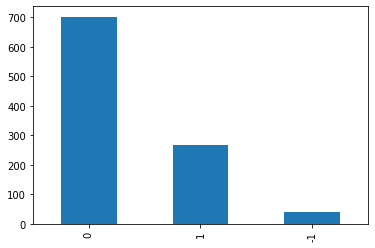

   label  count
0     -1    198
1      0   2072
2      1    760
   label  count
0     -1     41
1      0    702
2      1    267


In [8]:
import pandas as pd

train_data = pd.read_csv("/content/train_dataset_3031.csv",encoding='cp949')
test_data = pd.read_csv("/content/test_dataset_롯데리아.csv",encoding='cp949')

%matplotlib inline
import matplotlib.pyplot as plt
train_data['label'].value_counts().plot(kind='bar')
plt.show()
test_data['label'].value_counts().plot(kind='bar')
plt.show()

print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

In [10]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 450kB 36.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [11]:
#데이터 전처리
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = []
for sentence in train_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

X_test = []

for sentence in test_data['title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [12]:
#토큰화 잘 되었는지 체크
print(X_train[:3])
print(X_test[:3])

[['핫', '시', '즈', '너', '동대문', '엽기', '떡볶이', 'tvN', '드라마', '슬기롭다', '의사', '생활', '시즌', '2', '제작', '지'], ['슬기롭다', '의사', '생활', '시즌', '2', '동대문', '엽기', '떡볶이', '제작', '지원'], ['동대문', '엽기', '떡볶이', '브랜드', '유니폼', '무상', '지원', '유니폼', '캠페인', '진행']]
[['롯데리아', '코로나', '19', '백신', '접종', '고객', '할인', '행사'], ['롯데리아', '코로나', '백신', '접종', '고객', '30', '할인', '주다'], ['BTS', '세트', '’', '탓', '롯데리아', '감자', '튀김', '없다', '알', '고', '보다']]


In [13]:
#정수인코딩
from keras.preprocessing.text import Tokenizer 

max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)


In [14]:
#정수인코딩 체크
print(X_train[:3])
print(X_test[:3])

[[113, 83, 449, 357, 11, 9, 5, 3078, 656, 2116, 2117, 657, 532, 34, 1345, 533], [2116, 2117, 657, 532, 34, 11, 9, 5, 1345, 742], [11, 9, 5, 45, 1643, 3079, 742, 1643, 358, 33]]
[[54, 93, 141, 15, 166], [54, 141, 1362, 15, 892], [110, 8, 1427, 226, 116, 897, 221, 48]]


제목의 최대 길이 :  19
제목의 평균 길이 :  11.356765676567656


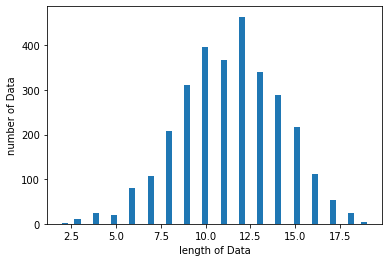

제목의 최대 길이 :  14
제목의 평균 길이 :  7.079207920792079


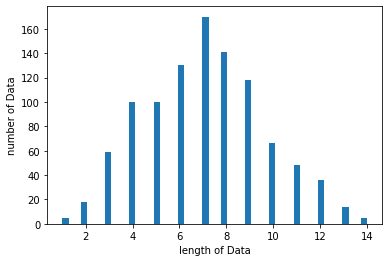

In [15]:
#데이터분포 체크 - train
print("제목의 최대 길이 : ", max(len(l) for l in X_train)) 
print("제목의 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()
#데이터분포 체크 - test
print("제목의 최대 길이 : ", max(len(l) for l in X_test)) 
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data')
plt.show()

In [16]:
#y값 one-hot encoding
import numpy as np

y_train = [] 
y_test = [] 

for i in range(len(train_data['label'])): 
  if train_data['label'].iloc[i] == 1: 
    y_train.append([0, 0, 1]) 
  elif train_data['label'].iloc[i] == 0: 
    y_train.append([0, 1, 0]) 
  elif train_data['label'].iloc[i] == -1: 
    y_train.append([1, 0, 0]) 
    
for i in range(len(test_data['label'])): 
  if test_data['label'].iloc[i] == 1: 
    y_test.append([0, 0, 1]) 
  elif test_data['label'].iloc[i] == 0: 
    y_test.append([0, 1, 0]) 
  elif test_data['label'].iloc[i] == -1: 
    y_test.append([1, 0, 0]) 
    
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [17]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [18]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [19]:
#모델만들기
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 

X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [20]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
273/273 [==============================] - 30s 40ms/step - loss: 0.7017 - accuracy: 0.7322 - val_loss: 0.2971 - val_accuracy: 0.9043
Epoch 2/10
273/273 [==============================] - 10s 35ms/step - loss: 0.1842 - accuracy: 0.9497 - val_loss: 0.2493 - val_accuracy: 0.9142
Epoch 3/10
273/273 [==============================] - 10s 35ms/step - loss: 0.0781 - accuracy: 0.9749 - val_loss: 0.2766 - val_accuracy: 0.9340
Epoch 4/10
273/273 [==============================] - 10s 35ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.2657 - val_accuracy: 0.9340
Epoch 5/10
273/273 [==============================] - 10s 35ms/step - loss: 0.0211 - accuracy: 0.9952 - val_loss: 0.3353 - val_accuracy: 0.9406
Epoch 6/10
273/273 [==============================] - 9s 35ms/step - loss: 0.0233 - accuracy: 0.9949 - val_loss: 0.3110 - val_accuracy: 0.9274
Epoch 7/10
273/273 [==============================] - 9s 35ms/step - loss: 0.0054 - accuracy: 0.9976 - val_loss: 0.3088 - val_accuracy: 0

In [21]:
print("정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

32/32 [==============================] - 0s 9ms/step - loss: 0.7930 - accuracy: 0.8881
정확도 : 88.81%


In [22]:
#optimizer 변경
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
273/273 [==============================] - 21s 68ms/step - loss: 0.7101 - accuracy: 0.7374 - val_loss: 0.2616 - val_accuracy: 0.9076
Epoch 2/10
273/273 [==============================] - 17s 62ms/step - loss: 0.0797 - accuracy: 0.9790 - val_loss: 0.2257 - val_accuracy: 0.9208
Epoch 3/10
273/273 [==============================] - 16s 60ms/step - loss: 0.0123 - accuracy: 0.9977 - val_loss: 0.2588 - val_accuracy: 0.9406
Epoch 4/10
273/273 [==============================] - 16s 60ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2103 - val_accuracy: 0.9307
Epoch 5/10
273/273 [==============================] - 16s 60ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.2572 - val_accuracy: 0.9340
Epoch 6/10
273/273 [==============================] - 17s 61ms/step - loss: 5.9321e-04 - accuracy: 1.0000 - val_loss: 0.2744 - val_accuracy: 0.9373
Epoch 7/10
273/273 [==============================] - 17s 61ms/step - loss: 1.9484e-04 - accuracy: 1.0000 - val_loss: 0.2523 - val_a

In [23]:
print("정확도 : {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

32/32 [==============================] - 0s 9ms/step - loss: 0.5248 - accuracy: 0.8960
정확도 : 89.60%


In [24]:
predict = model.predict(X_test)

In [25]:
import numpy as np
predict_labels = np.argmax(predict, axis = 1)
original_labels = np.argmax(y_test, axis = 1)

for i in range(30):
  print("기사제목: ", test_data['title'].iloc[i], "/\t 원래라벨: ",original_labels[i],
        "/\t 예측한 라벨: ", predict_labels[i])

기사제목:  롯데리아 코로나19 백신 접종 고객에 할인행사 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데리아 코로나 백신 접종 고객 30 할인해 준다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  BTS세트’ 탓에 롯데리아 감자튀김 없다 알고보니 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데리아 감자튀김 BTS 때문에 사라졌다내일부터 정상판매 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  잘 나가는 맘스터치롯데리아와 매장수 격차 더 벌렸다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  당신의 취향은맥도날드 롯데리아 버거킹 노브랜드 버거 전쟁 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  재택플러스 롯데리아 감자튀김 실종 BTS 때문 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  BTS세트 때문에 품절 루머 돌던 롯데리아 감자튀김 정상화 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데리아 백신 접종자는 30 할인해드려요” /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  맛있는TMI맥도날드 BTS세트에는 왜 버거가 없을까 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데리아·엔제리너스 ESG 경영 강화한다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데GRS 롯데리아 착한점심 가격 확 낮춰 /	 원래라벨:  2 /	 예측한 라벨:  1
기사제목:  데일리픽 넷플릭스 하반기 인기작은 롯데리아 감자튀김 구설수 /	 원래라벨:  0 /	 예측한 라벨:  2
기사제목:  잘 나가는 맘스터치롯데리아와 매장수 격차 더 벌렸다 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  충북 청주 사창동 롯데리아에서 닥스훈트 한 쌍 발견 보호 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  브리핑오리온·동원FB·롯데푸드·롯데리아·매일유업 /	 원래라벨:  1 /	 예측한 라벨:  1
기사제목:  롯데리아 코로나 영